In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np

In [2]:
#Read the Dataset
df_train = pd.read_csv('Dataset_train_padel_edited.csv', sep=',')
df_test = pd.read_csv('Dataset_test_padel_edited.csv', sep=',')

In [3]:
df_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,0.2233,0.049863,70.0534,76.025376,12,13,66,34,32,...,71.201670,2.094167,18.726043,12.038283,6.687760,3392.0,73.0,9.561,198.0,0.0
1,1,-0.2439,0.059487,14.3849,35.047516,12,12,29,17,12,...,34.154841,2.009108,7.396095,7.396095,0.000000,530.0,24.0,5.852,84.0,0.0
2,0,-0.6813,0.464170,42.7040,62.218688,18,18,49,33,16,...,67.163315,2.035252,33.832420,12.421201,15.403882,3502.0,53.0,5.992,176.0,1.0
3,2,0.2023,0.040925,44.9687,71.669860,23,24,56,36,20,...,72.666696,2.018519,36.153491,12.057732,9.505728,4274.0,60.0,5.230,194.0,1.0
4,1,2.0771,4.314344,159.7139,117.142373,6,6,107,46,61,...,93.603246,2.034853,12.958770,9.916845,3.041925,7511.0,100.0,13.527,270.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0,-0.4369,0.190882,49.6836,30.143102,0,0,28,14,14,...,28.014526,2.001038,10.593134,10.593134,0.000000,266.0,23.0,-1.060,74.0,1.0
2617,1,-8.6979,75.653464,122.6846,113.445994,9,10,106,48,58,...,94.996453,1.979093,32.060122,14.860270,17.199852,10085.0,65.0,6.591,222.0,0.0
2618,0,-0.0984,0.009683,59.6578,74.620274,21,22,59,41,18,...,83.091605,2.026625,44.040188,12.459157,12.378858,5790.0,69.0,5.298,230.0,1.0
2619,2,0.8957,0.802278,31.3194,88.960204,33,35,71,43,28,...,88.708828,2.062996,25.012148,7.035760,9.898856,6245.0,77.0,13.130,238.0,1.0


In [4]:
df_test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,-0.8246,0.679965,30.8082,58.953446,19,22,49,27,22,...,56.905772,2.107621,12.852939,6.286213,6.566726,2162.0,40.0,5.853,148.0,1.0
1,0,-0.1388,0.019265,26.5318,60.611446,21,24,48,26,22,...,53.950565,2.075022,5.706052,2.524466,0.000000,1746.0,41.0,9.201,138.0,1.0
2,2,-0.9673,0.935669,191.7513,127.715131,0,0,120,53,67,...,107.184976,2.022358,29.004188,25.990040,3.014148,11700.0,116.0,8.505,304.0,1.0
3,0,-0.5162,0.266462,86.4240,114.598134,30,30,93,55,38,...,111.591161,2.028930,39.705534,27.344229,3.088891,16116.0,80.0,8.885,280.0,1.0
4,0,1.7350,3.010225,81.9806,69.672962,9,10,62,28,34,...,58.031889,2.072567,9.271157,2.567150,6.704006,1770.0,56.0,7.591,166.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2,-1.4182,2.011291,44.6940,58.103067,15,17,49,30,19,...,61.278840,2.042628,21.524865,18.382871,3.141994,2683.0,48.0,3.565,160.0,1.0
1120,1,-1.0189,1.038157,31.1932,64.971032,21,24,54,30,24,...,61.824667,2.060822,10.982047,10.982047,0.000000,2801.0,46.0,8.771,156.0,1.0
1121,0,-8.5929,73.837930,140.1859,115.544338,0,0,111,45,66,...,90.004484,2.000100,21.859161,21.859161,0.000000,11495.0,56.0,7.914,214.0,0.0
1122,2,-0.9440,0.891136,24.1688,55.960688,20,22,45,29,16,...,59.398386,2.048220,14.893385,14.893385,0.000000,2008.0,54.0,7.252,158.0,0.0


In [5]:
X_train = df_train.loc[:, ~df_train.columns.isin(['active'])]
X_test = df_test.loc[:, ~df_test.columns.isin(['active'])]

In [6]:
y_train = df_train['active']
y_test = df_test['active']

In [7]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
#Random Forest
clf = RandomForestClassifier(random_state=33)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="macro")
recall = recall_score(y_test,y_pred, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
activity = ['non-active', 'active']
print(classification_report(y_test, y_pred, target_names=activity))

Accuracy: 0.9350533807829181 ;
Precision: 0.9349077090119435 ;
Recall: 0.9342213082085864 ;

              precision    recall  f1-score   support

  non-active       0.93      0.92      0.93       515
      active       0.94      0.94      0.94       609

    accuracy                           0.94      1124
   macro avg       0.93      0.93      0.93      1124
weighted avg       0.94      0.94      0.94      1124



# Feature Importance

In [9]:
#Using Feature Importance
clf.feature_importances_

array([2.32903814e-05, 1.50272058e-02, 1.20458516e-03, ...,
       2.45271863e-03, 7.81500137e-04, 3.68168642e-04])

In [10]:
#Sorting
feature_importances = pd.DataFrame(clf.feature_importances_, index = df_train.columns[:-1], columns=['importance']).sort_values('importance', ascending=False)

In [11]:
#Sorted from the most important to less important features
feature_importances

,importance
ALogP,0.015027
piPC7,0.014992
AATS5i,0.014345
GATS1i,0.013870
piPC10,0.013215
...,...
minsssSiH,0.000000
minssssSi,0.000000
minsPH2,0.000000
minssPH,0.000000


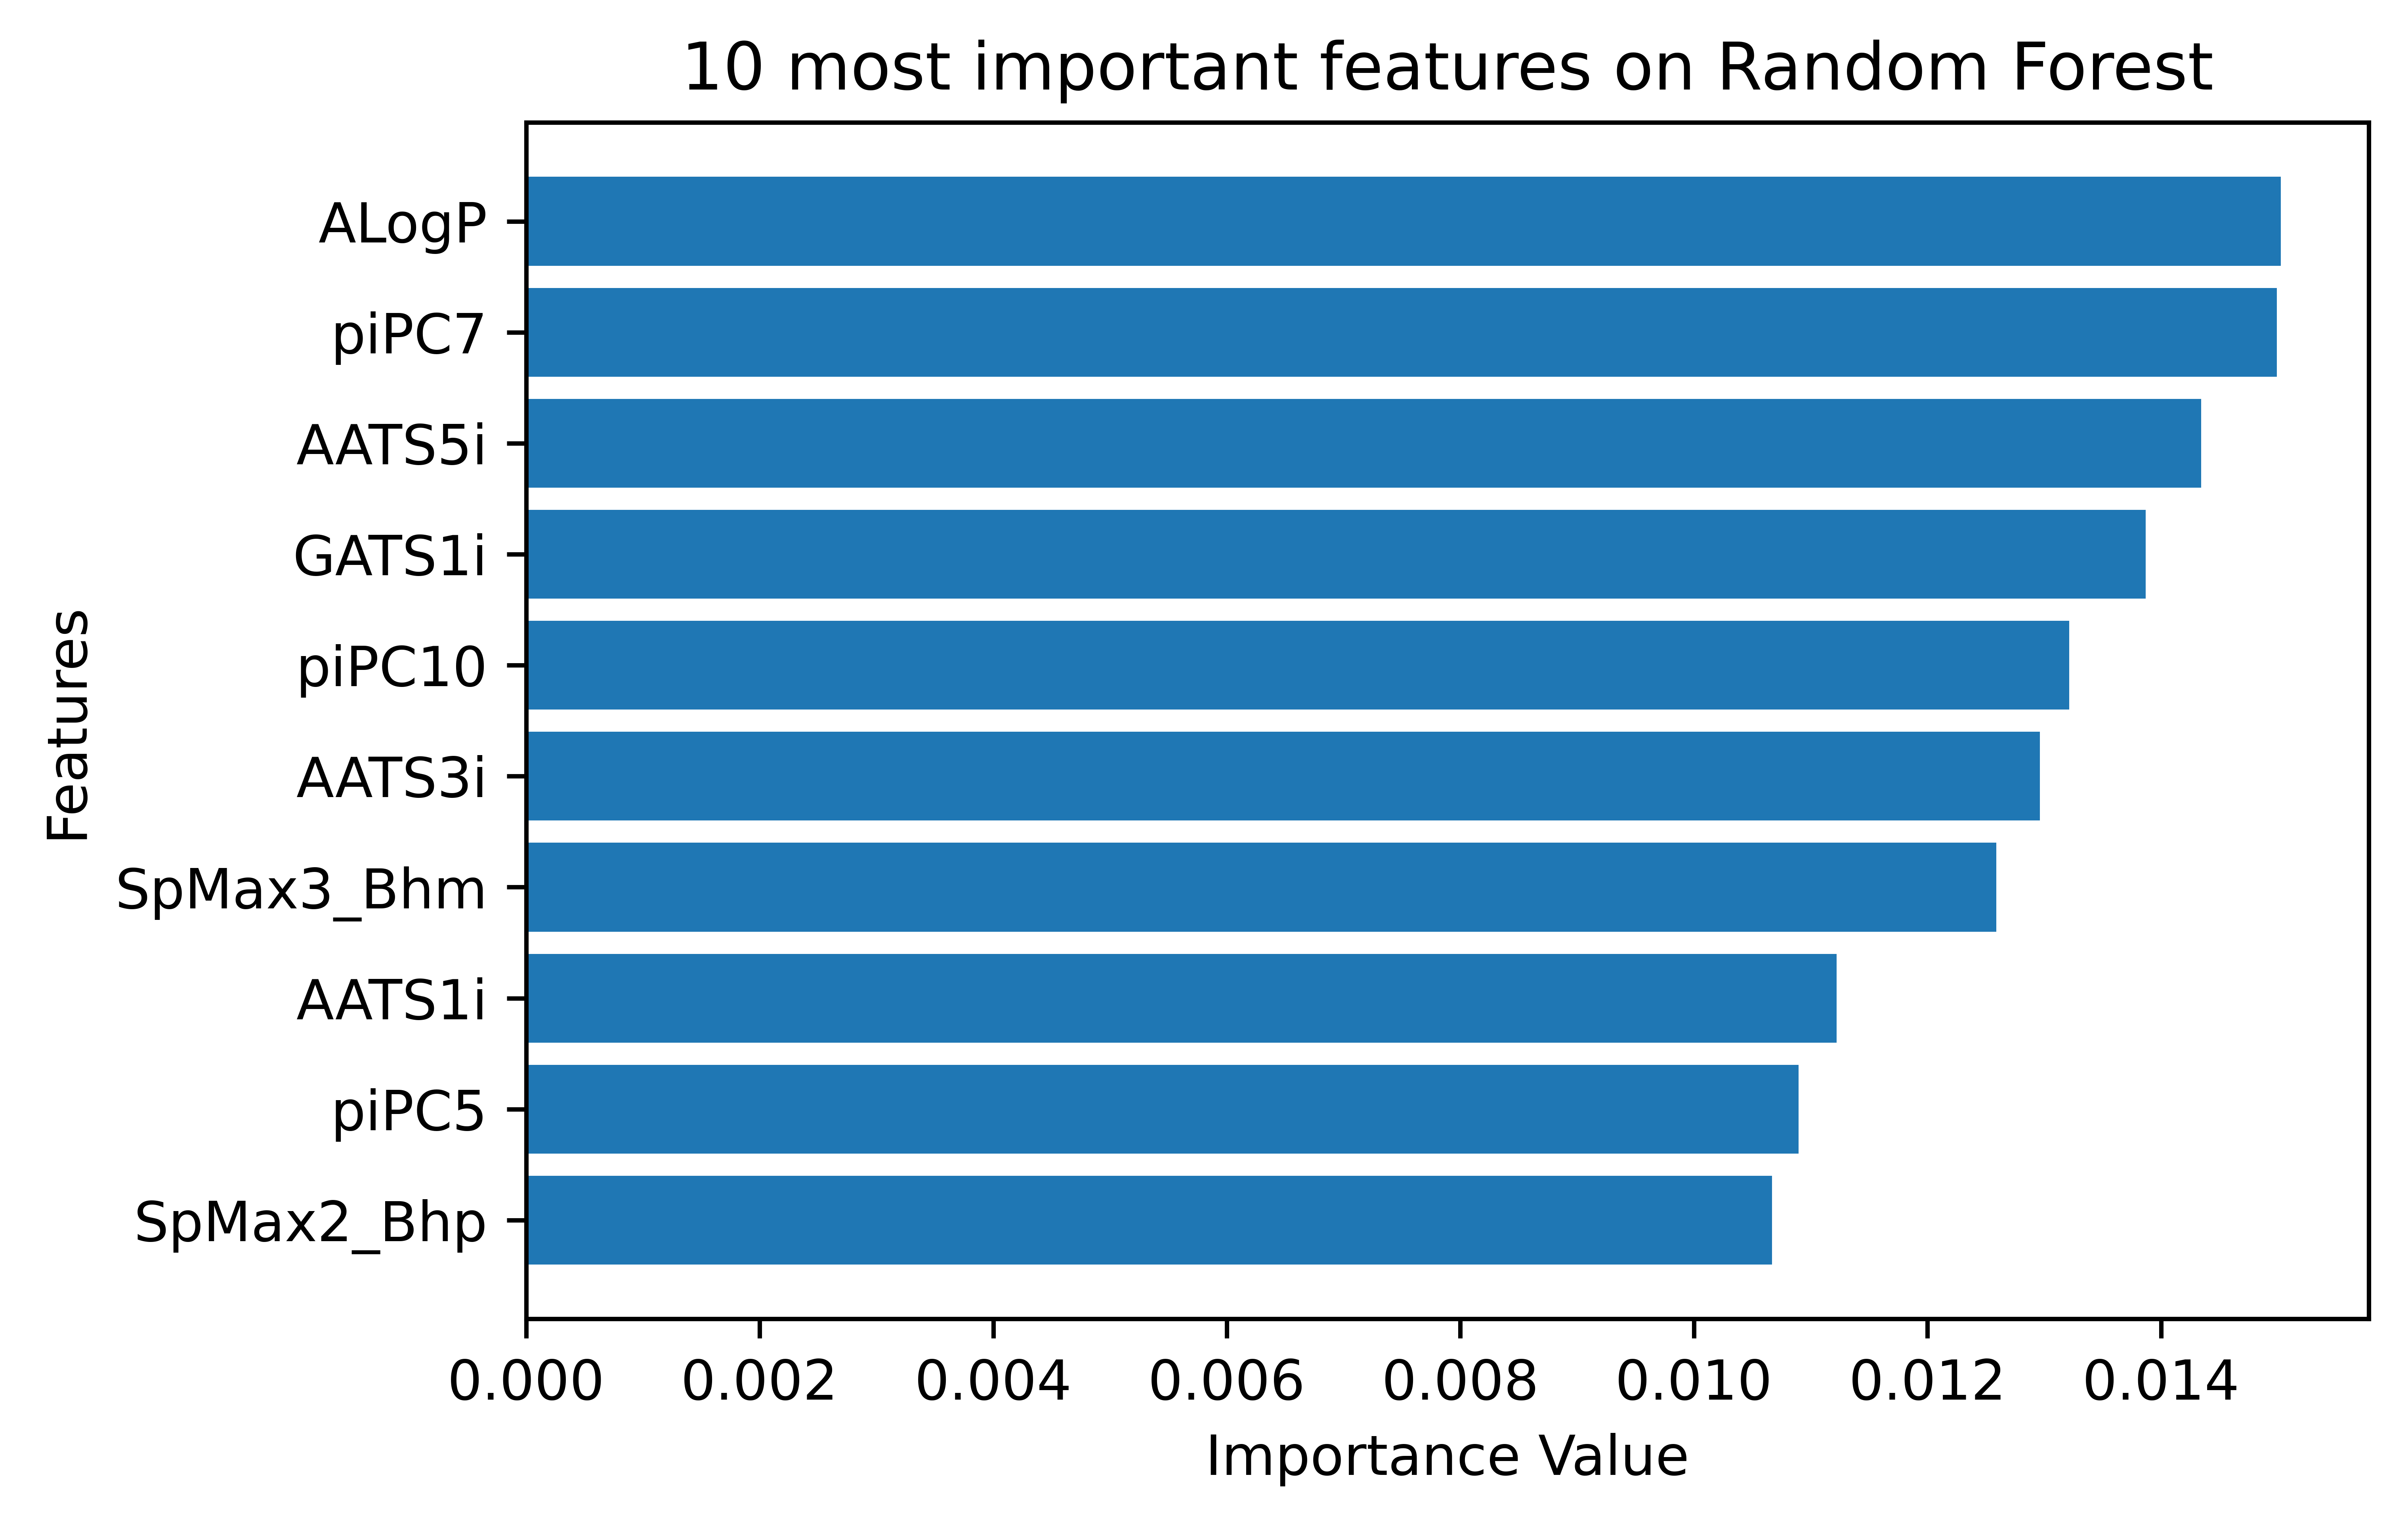

In [12]:
#Visualization
importance = clf.feature_importances_
top10 = feature_importances[:10]
Top10 = top10.index

sort = np.sort(clf.feature_importances_)
importance_values = sort[::-1]
top10values = importance_values[:10]

plt.barh(Top10, top10values)
plt.gca().invert_yaxis()
plt.title('10 most important features on Random Forest')
plt.ylabel('Features')
plt.xlabel('Importance Value')
plt.gcf().set_dpi(1000)
plt.show()

In [13]:
df_t = feature_importances.T
df_t 

,ALogP,piPC7,AATS5i,GATS1i,piPC10,AATS3i,SpMax3_Bhm,AATS1i,piPC5,SpMax2_Bhp,...,minssssNp,minsssP,minaOm,minsSiH3,minssSiH2,minsssSiH,minssssSi,minsPH2,minssPH,ntN
importance,0.015027,0.014992,0.014345,0.01387,0.013215,0.012961,0.01259,0.011222,0.010898,0.01067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Delete 0 importance
for column in df_train:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_train = df_train.drop(column , 1)

for column in df_test:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_test = df_test.drop(column , 1)

for column in df_t :
  if float(df_t[column] == 0.0):
    df_t = df_t.drop(column , 1)

C:\Users\garud\AppData\Local\Temp/ipykernel_7300/2004814466.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_7300/2004814466.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_7300/2004814466.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_t = df_t.drop(column , 1)


In [15]:
len(df_t.columns)

1145

In [16]:
len(df_train.columns)

1146

In [17]:
len(df_test.columns)

1146

In [18]:
#Sort df_train and df_test based on Feature Importance
df_train_final = pd.concat([df_t, df_train], axis=0)
df_test_final = pd.concat([df_t, df_test], axis=0)

In [19]:
df_train_final

,ALogP,piPC7,AATS5i,GATS1i,piPC10,AATS3i,SpMax3_Bhm,AATS1i,piPC5,SpMax2_Bhp,...,nF,nHBDon,apol,minHaaNH,maxaaNH,ETA_dPsi_B,naaS,nF10HeteroRing,nBr,active
importance,0.015027,0.014992,0.014345,0.013870,0.013215,0.012961,0.012590,0.011222,0.010898,0.010670,...,0.000013,0.000013,0.000013,0.000011,0.000008,0.000005,0.000004,0.000002,0.000002,NaN
0,0.223300,6.782086,164.451643,1.147537,7.828312,156.151974,3.649412,144.103392,6.066978,3.863048,...,0.000000,0.000000,76.025376,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0
1,-0.243900,5.614496,158.595329,0.838209,6.305819,149.950734,3.240455,142.117979,5.332115,3.733493,...,0.000000,2.000000,35.047516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.681300,6.710904,163.061635,1.047472,7.606574,155.328396,3.909339,147.769220,6.133534,3.821462,...,0.000000,3.000000,62.218688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.202300,6.756860,158.852625,0.990373,7.623300,155.561233,4.201346,144.077396,6.154991,4.029763,...,2.000000,2.000000,71.669860,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,-0.436900,4.290459,172.017959,1.232503,2.564949,155.383049,3.040313,146.293080,4.330733,3.294565,...,0.000000,2.000000,30.143102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2617,-8.697900,6.230343,165.380718,1.415293,6.466770,164.362516,3.644914,149.627805,5.701070,3.632538,...,0.000000,7.000000,113.445994,0.371070,3.124797,0.000000,0.000000,0.000000,0.000000,0.0
2618,-0.098400,7.051768,165.705132,0.985307,7.960656,157.779061,4.095520,145.713515,6.415199,4.062781,...,4.000000,2.000000,74.620274,0.382578,3.046011,0.000000,0.000000,0.000000,0.000000,1.0
2619,0.895700,7.453467,156.799843,0.836842,8.711181,155.189151,3.957713,143.358961,6.655521,3.992730,...,2.000000,2.000000,88.960204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [20]:
df_test_final

,ALogP,piPC7,AATS5i,GATS1i,piPC10,AATS3i,SpMax3_Bhm,AATS1i,piPC5,SpMax2_Bhp,...,nF,nHBDon,apol,minHaaNH,maxaaNH,ETA_dPsi_B,naaS,nF10HeteroRing,nBr,active
importance,0.015027,0.014992,0.014345,0.013870,0.013215,0.012961,0.012590,0.011222,0.010898,0.010670,...,0.000013,0.000013,0.000013,0.000011,0.000008,0.000005,0.000004,0.000002,0.000002,NaN
0,-0.824600,7.566388,160.724487,1.223299,9.034182,157.193633,3.636196,143.204468,6.478510,3.840928,...,0.000000,0.000000,58.953446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,-0.138800,7.511631,148.942243,0.822384,8.975389,149.832149,3.644315,138.903294,6.494179,3.944568,...,0.000000,1.000000,60.611446,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
2,-0.967300,6.267201,162.568800,1.323381,7.038784,154.182380,3.742562,145.683409,5.720312,3.837560,...,0.000000,6.000000,127.715131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,-0.516200,6.949347,156.635174,1.205445,7.993952,153.965456,3.968322,141.663853,6.493659,3.982744,...,0.000000,1.000000,114.598134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-1.418200,7.281805,154.282050,0.990983,8.552273,156.433690,3.657560,143.808714,6.278639,3.789095,...,0.000000,2.000000,58.103067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1120,-1.018900,7.557608,151.927895,1.001141,9.025955,153.556623,3.644861,141.237026,6.524342,3.919984,...,0.000000,1.000000,64.971032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1121,-8.592900,4.644391,164.546087,1.441462,4.779123,163.764515,3.620348,145.891226,4.644391,3.707446,...,0.000000,4.000000,115.544338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1122,-0.944000,7.416491,153.466798,0.734443,8.460678,145.987502,3.500926,141.560852,6.540850,3.983270,...,0.000000,4.000000,55.960688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [21]:
#Remove the [importance] row
df_train = df_train_final.iloc[1:]
df_test = df_test_final.iloc[1:]

In [22]:
df_train

,ALogP,piPC7,AATS5i,GATS1i,piPC10,AATS3i,SpMax3_Bhm,AATS1i,piPC5,SpMax2_Bhp,...,nF,nHBDon,apol,minHaaNH,maxaaNH,ETA_dPsi_B,naaS,nF10HeteroRing,nBr,active
0,0.2233,6.782086,164.451643,1.147537,7.828312,156.151974,3.649412,144.103392,6.066978,3.863048,...,0.0,0.0,76.025376,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0
1,-0.2439,5.614496,158.595329,0.838209,6.305819,149.950734,3.240455,142.117979,5.332115,3.733493,...,0.0,2.0,35.047516,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,-0.6813,6.710904,163.061635,1.047472,7.606574,155.328396,3.909339,147.769220,6.133534,3.821462,...,0.0,3.0,62.218688,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.2023,6.756860,158.852625,0.990373,7.623300,155.561233,4.201346,144.077396,6.154991,4.029763,...,2.0,2.0,71.669860,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0
4,2.0771,6.299753,162.738970,1.214179,6.971375,150.947911,3.813617,143.710299,5.867353,3.841771,...,0.0,3.0,117.142373,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,-0.4369,4.290459,172.017959,1.232503,2.564949,155.383049,3.040313,146.293080,4.330733,3.294565,...,0.0,2.0,30.143102,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
2617,-8.6979,6.230343,165.380718,1.415293,6.466770,164.362516,3.644914,149.627805,5.701070,3.632538,...,0.0,7.0,113.445994,0.371070,3.124797,0.0,0.0,0.0,0.0,0.0
2618,-0.0984,7.051768,165.705132,0.985307,7.960656,157.779061,4.095520,145.713515,6.415199,4.062781,...,4.0,2.0,74.620274,0.382578,3.046011,0.0,0.0,0.0,0.0,1.0
2619,0.8957,7.453467,156.799843,0.836842,8.711181,155.189151,3.957713,143.358961,6.655521,3.992730,...,2.0,2.0,88.960204,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0


In [23]:
df_test

,ALogP,piPC7,AATS5i,GATS1i,piPC10,AATS3i,SpMax3_Bhm,AATS1i,piPC5,SpMax2_Bhp,...,nF,nHBDon,apol,minHaaNH,maxaaNH,ETA_dPsi_B,naaS,nF10HeteroRing,nBr,active
0,-0.8246,7.566388,160.724487,1.223299,9.034182,157.193633,3.636196,143.204468,6.478510,3.840928,...,0.0,0.0,58.953446,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.1388,7.511631,148.942243,0.822384,8.975389,149.832149,3.644315,138.903294,6.494179,3.944568,...,0.0,1.0,60.611446,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.9673,6.267201,162.568800,1.323381,7.038784,154.182380,3.742562,145.683409,5.720312,3.837560,...,0.0,6.0,127.715131,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.5162,6.949347,156.635174,1.205445,7.993952,153.965456,3.968322,141.663853,6.493659,3.982744,...,0.0,1.0,114.598134,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.7350,6.839351,161.644072,1.275070,7.521777,153.162538,3.539186,144.038130,6.045598,3.889208,...,0.0,1.0,69.672962,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-1.4182,7.281805,154.282050,0.990983,8.552273,156.433690,3.657560,143.808714,6.278639,3.789095,...,0.0,2.0,58.103067,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1120,-1.0189,7.557608,151.927895,1.001141,9.025955,153.556623,3.644861,141.237026,6.524342,3.919984,...,0.0,1.0,64.971032,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1121,-8.5929,4.644391,164.546087,1.441462,4.779123,163.764515,3.620348,145.891226,4.644391,3.707446,...,0.0,4.0,115.544338,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1122,-0.9440,7.416491,153.466798,0.734443,8.460678,145.987502,3.500926,141.560852,6.540850,3.983270,...,0.0,4.0,55.960688,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ========================================

In [24]:
#Random Forest with every 10% of features
x = 10
best_accuracy = 0

feature_percentage = []
arr_accuracy = []

while x<=100:
    #Create array feature percentage for plotting
    feature_percentage.append(x)
    
    tenPercent = len(df_t.columns) * (x/100)
    feature = feature_importances[:round(tenPercent)] #Take specific amount of features

    feature_name = feature.index

    #Create new df_train
    new_df_train = df_train.loc[:,feature_name]
    new_df_train['active'] = df_train['active']

    #Create new df_test
    new_df_test = df_test.loc[:,feature_name]
    new_df_test['active'] = df_test['active']

    new_X_train = new_df_train.loc[:, ~new_df_train.columns.isin(['active'])]
    new_X_test = new_df_test.loc[:, ~new_df_test.columns.isin(['active'])]

    new_y_train = new_df_train['active']
    new_y_test = new_df_test['active']

    clf1 = RandomForestClassifier(random_state=33)
    #clf1.fit(new_X_train, new_y_train)
    #y_pred = clf1.predict(new_X_test)
    
    print(x,"% of the dataset")
    print(len(new_df_train.columns),"features used")
    
    # prepare the cross-validation procedure
    score = cross_val_score(clf1, new_X_train, new_y_train, scoring='accuracy', cv = 10)
    accuracy = np.average(score)
    
    print("Accuracy: ", accuracy,"\n")
    #accuracy = accuracy_score(new_y_test,y_pred)
    #precision = precision_score(new_y_test,y_pred, average="macro")
    #recall = recall_score(new_y_test,y_pred, average="macro")
    
    #Create array accuracy for plotting
    arr_accuracy.append(accuracy)
    
    #print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
    #activity = ['non-active', 'active']
    #print(classification_report(new_y_test, y_pred, target_names=activity))
    print("======================================================\n")
    
    if best_accuracy < accuracy:
        best_new_X_train = new_X_train
        best_new_X_test = new_X_test
        best_new_y_train = new_y_train
        best_new_y_test = new_y_test
        
        bestPercentage = x
        bestSumOfDataset = len(new_df_train.columns)
        
        best_accuracy = accuracy
        #best_precision = precision
        #best_recall = recall
        
        #class_report = classification_report(best_new_y_test, y_pred, target_names=activity)
    x += 10
    
print("BEST OUTPUT")
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")
print("Accuracy: ", accuracy)
#print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(best_accuracy,best_precision,best_recall))
#print(class_report)

10 % of the dataset
115 features used
Accuracy:  0.9297971149101674 


20 % of the dataset
230 features used
Accuracy:  0.9301802455519113 


30 % of the dataset
345 features used
Accuracy:  0.9339926856877486 


40 % of the dataset
459 features used
Accuracy:  0.9332293269091225 


50 % of the dataset
573 features used
Accuracy:  0.9336124575508664 


60 % of the dataset
688 features used
Accuracy:  0.9336139088032972 


70 % of the dataset
803 features used
Accuracy:  0.9332278756566916 


80 % of the dataset
917 features used
Accuracy:  0.9339897831828867 


90 % of the dataset
1031 features used
Accuracy:  0.9339912344353177 


100 % of the dataset
1146 features used
Accuracy:  0.9328476475198096 


BEST OUTPUT
30 % of the dataset
345 features used

Accuracy:  0.9328476475198096


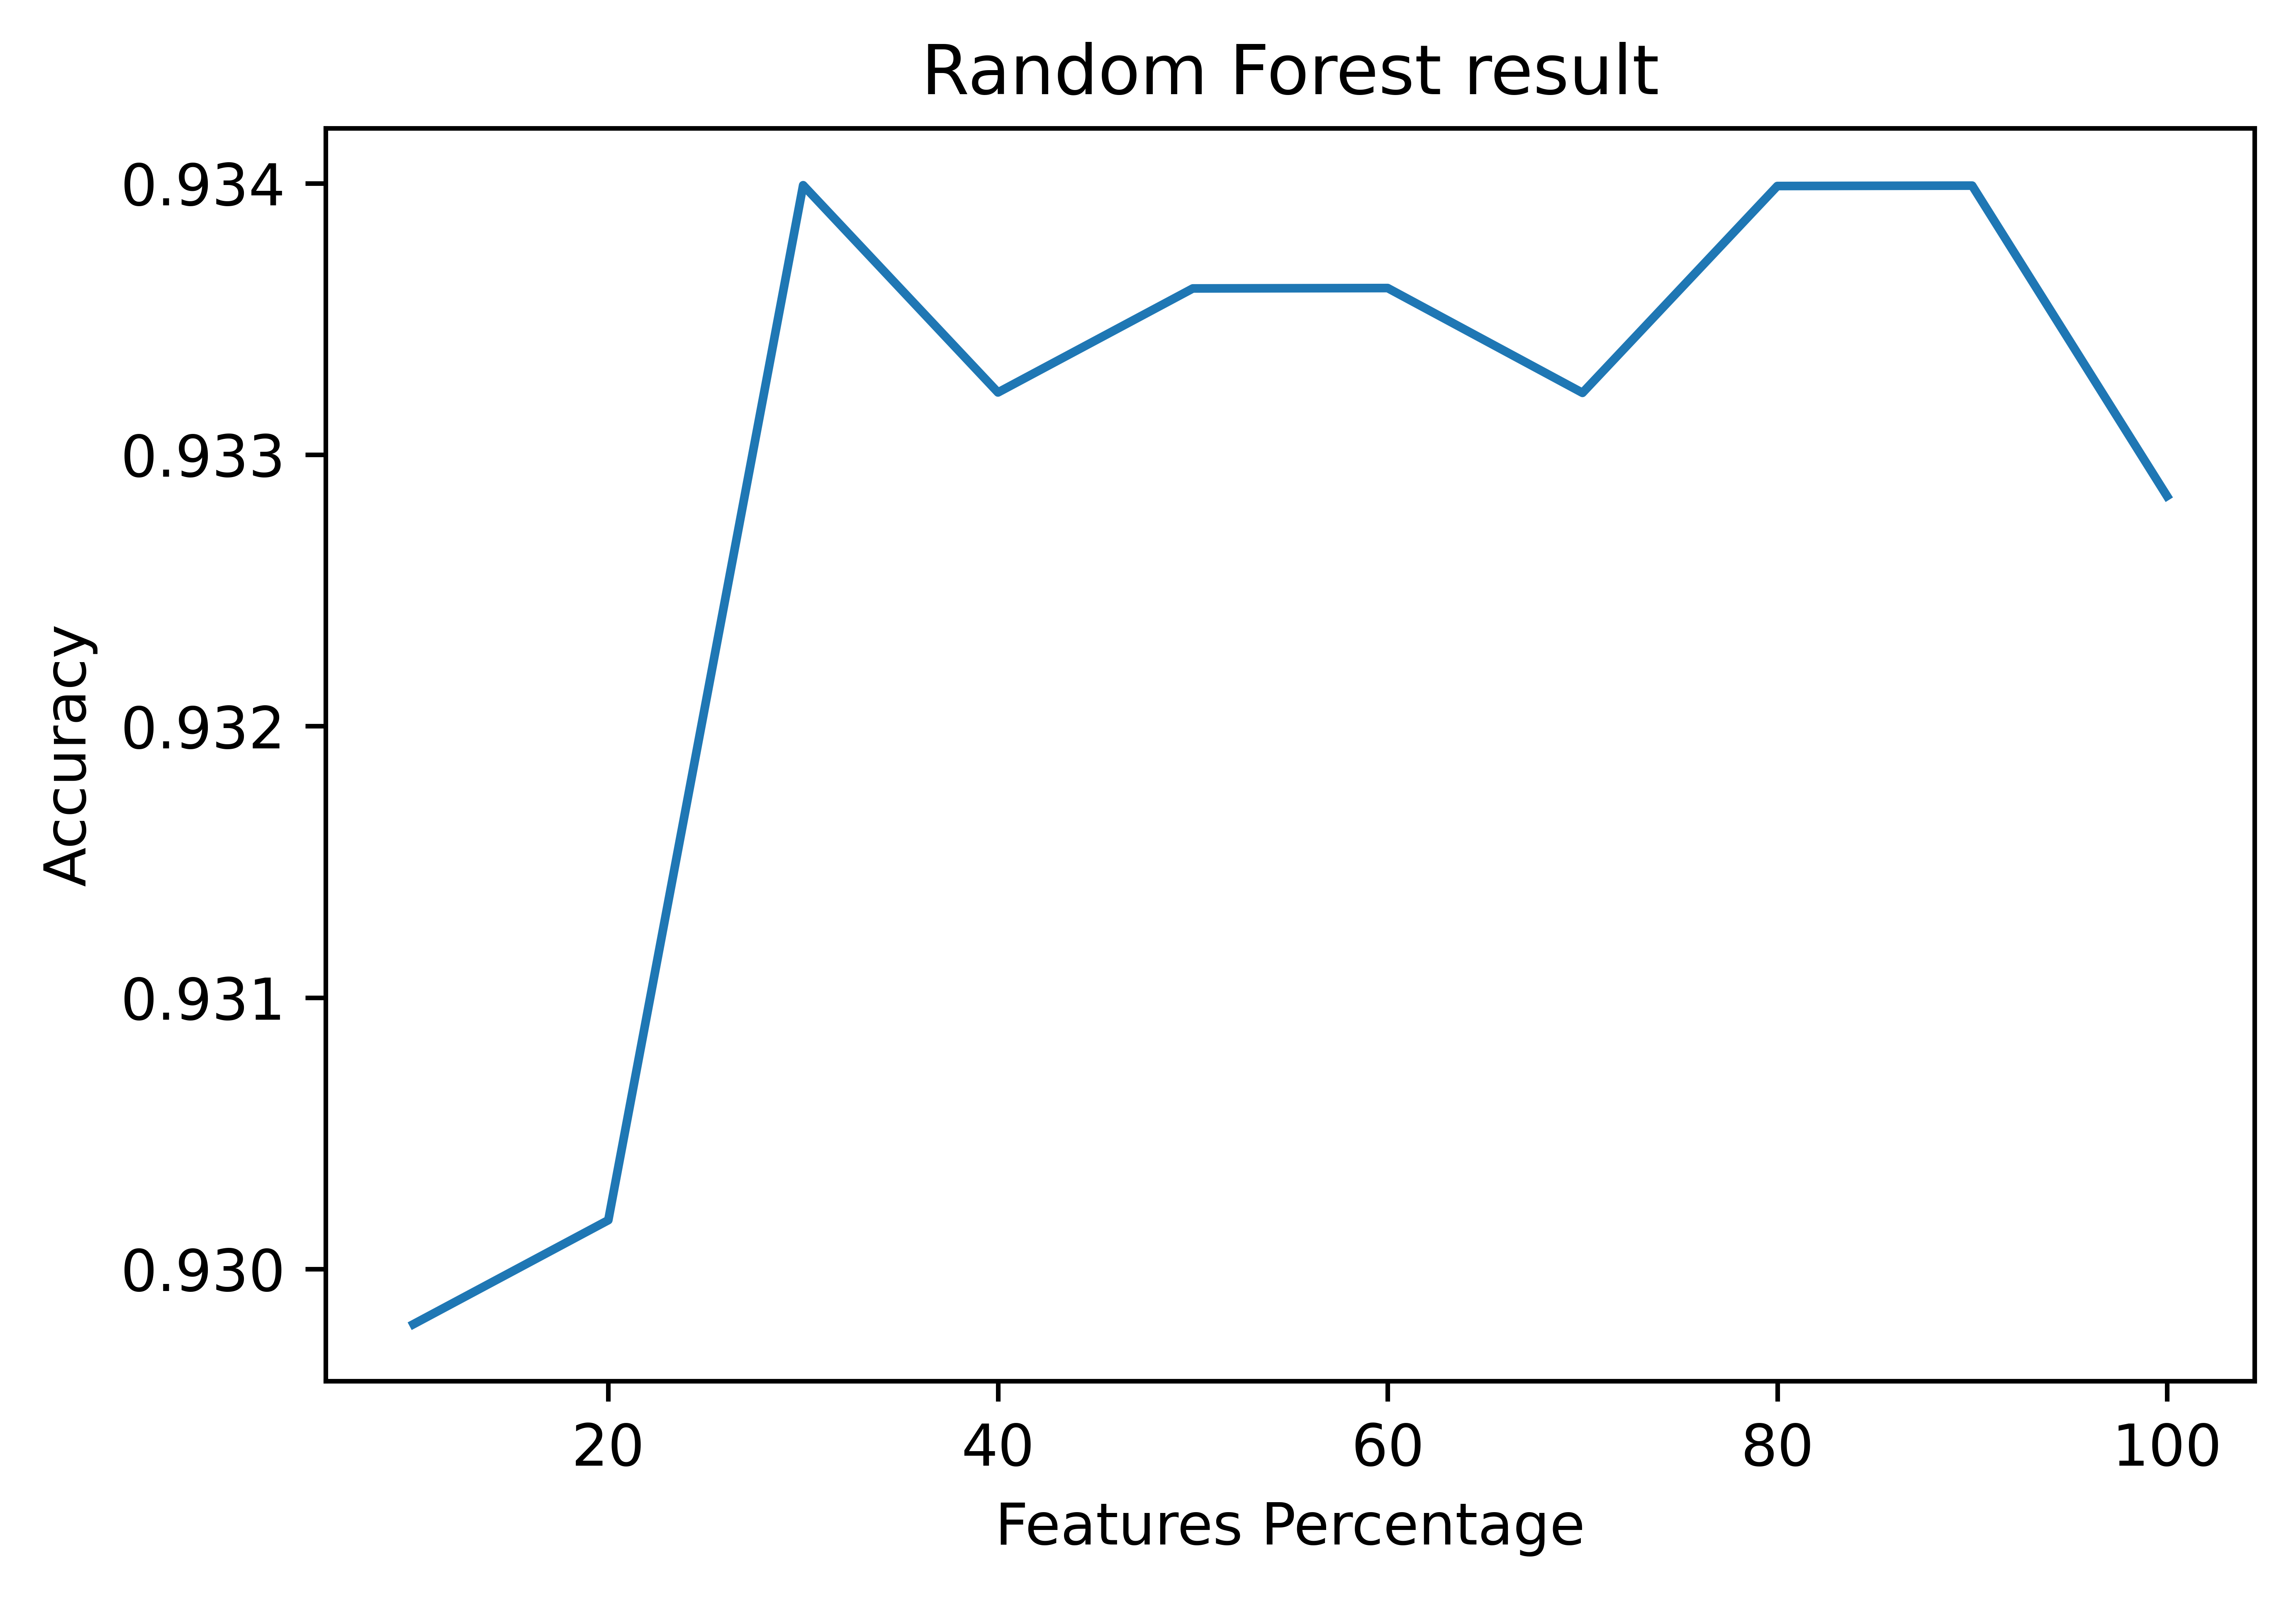

In [25]:
plt.figure()
plt.title('Random Forest result')
plt.plot(feature_percentage, arr_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Features Percentage')
plt.gcf().set_dpi(1000)
plt.show()

# Grid Search CV

In [26]:
#Make a timer (optional)
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
   
# Fit the grid search to the data
from sklearn.model_selection import GridSearchCV

param_grid = {
              'max_depth': [None, 10, 20, 30],
              'min_samples_leaf': [1, 2, 3],
              'max_leaf_nodes' : [None, 4, 5, 6],
              'n_estimators': [100, 200, 300, 400, 500],
              'random_state': [33]
             }

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10, verbose = 3, scoring = 'accuracy')

start_time = timer(None)
grid.fit(best_new_X_train, best_new_y_train)
timer(start_time)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV 1/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.939 total time=   2.3s
[CV 2/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.947 total time=   2.1s
[CV 3/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.950 total time=   1.9s
[CV 4/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.939 total time=   2.1s
[CV 5/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.912 total time=   2.1s
[CV 6/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.947 total time=   2.1s
[CV 7/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, 

[CV 10/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.931 total time=   1.9s
[CV 1/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.932 total time=   3.9s
[CV 2/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.950 total time=   4.0s
[CV 3/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.935 total time=   3.9s
[CV 4/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.931 total time=   4.0s
[CV 5/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.905 total time=   4.0s
[CV 6/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.939 total time=   4.0s
[CV 7/10] END max_depth=None, max

[CV 10/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.931 total time=   3.9s
[CV 1/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.928 total time=   5.8s
[CV 2/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.947 total time=   5.8s
[CV 3/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.939 total time=   5.7s
[CV 4/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.927 total time=   5.9s
[CV 5/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.901 total time=   5.8s
[CV 6/10] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.943 total time=   5.9s
[CV 7/10] END max_depth=None, max

[CV 10/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.836 total time=   2.3s
[CV 1/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.844 total time=   3.0s
[CV 2/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.870 total time=   3.0s
[CV 3/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.855 total time=   3.0s
[CV 4/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.859 total time=   3.0s
[CV 5/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.844 total time=   2.9s
[CV 6/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.870 total time=   2.9s
[CV 7/10] END max_depth=None, max_leaf_nodes=4, min_sa

[CV 1/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.848 total time=   4.1s
[CV 2/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.870 total time=   4.1s
[CV 3/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.855 total time=   4.1s
[CV 4/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.859 total time=   4.0s
[CV 5/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.844 total time=   4.1s
[CV 6/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.866 total time=   4.0s
[CV 7/10] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.813 total time=   4.0s
[CV 8/10] END max_depth=None, max_leaf_nodes=4, min_sam

[CV 2/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.870 total time=   0.8s
[CV 3/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.866 total time=   0.8s
[CV 4/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.874 total time=   0.8s
[CV 5/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.847 total time=   0.8s
[CV 6/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.889 total time=   0.8s
[CV 7/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.821 total time=   0.8s
[CV 8/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.863 total time=   0.8s
[CV 9/10] END max_depth=None, max_leaf_nodes=5, min_sam

[CV 3/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.870 total time=   1.7s
[CV 4/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.878 total time=   1.7s
[CV 5/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.847 total time=   1.7s
[CV 6/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.882 total time=   1.7s
[CV 7/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.824 total time=   1.7s
[CV 8/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.863 total time=   1.7s
[CV 9/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.859 total time=   1.7s
[CV 10/10] END max_depth=None, max_leaf_nodes=5, min_sa

[CV 4/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.874 total time=   2.7s
[CV 5/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.847 total time=   2.7s
[CV 6/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.878 total time=   2.7s
[CV 7/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.832 total time=   2.7s
[CV 8/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.863 total time=   2.6s
[CV 9/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.863 total time=   2.6s
[CV 10/10] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.851 total time=   2.6s
[CV 1/10] END max_depth=None, max_leaf_nodes=5, min_sa

[CV 5/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.863 total time=   3.8s
[CV 6/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.889 total time=   3.8s
[CV 7/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.836 total time=   3.8s
[CV 8/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.874 total time=   3.8s
[CV 9/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.874 total time=   3.8s
[CV 10/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.866 total time=   3.8s
[CV 1/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.856 total time=   4.8s
[CV 2/10] END max_depth=None, max_leaf_nodes=6, min_sa

[CV 6/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.885 total time=   4.7s
[CV 7/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.836 total time=   4.7s
[CV 8/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.882 total time=   4.7s
[CV 9/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.870 total time=   4.8s
[CV 10/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.866 total time=   4.9s
[CV 1/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.856 total time=   0.9s
[CV 2/10] END max_depth=None, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.878 total time=   0.9s
[CV 3/10] END max_depth=None, max_leaf_nodes=6, min_sa

[CV 7/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.893 total time=   1.9s
[CV 8/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.927 total time=   1.9s
[CV 9/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.939 total time=   1.9s
[CV 10/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.931 total time=   1.9s
[CV 1/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.928 total time=   4.0s
[CV 2/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.947 total time=   3.9s
[CV 3/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.947 total time=   3.8s
[CV 4/10] END max_depth=10, max_leaf_nodes=None

[CV 8/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.935 total time=   3.8s
[CV 9/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.950 total time=   3.7s
[CV 10/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.943 total time=   3.8s
[CV 1/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.932 total time=   5.7s
[CV 2/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.950 total time=   5.7s
[CV 3/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.943 total time=   5.7s
[CV 4/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.931 total time=   5.6s
[CV 5/10] END max_depth=10, max_leaf_nodes=None

[CV 9/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.947 total time=   5.6s
[CV 10/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.943 total time=   5.6s
[CV 1/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.932 total time=   7.5s
[CV 2/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.943 total time=   7.5s
[CV 3/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.943 total time=   7.5s
[CV 4/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.927 total time=   7.5s
[CV 5/10] END max_depth=10, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.905 total time=   7.5s
[CV 6/10] END max_depth=10, max_leaf_nodes=None

[CV 1/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.848 total time=   4.0s
[CV 2/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.870 total time=   4.1s
[CV 3/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.855 total time=   4.0s
[CV 4/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.859 total time=   4.1s
[CV 5/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.844 total time=   4.1s
[CV 6/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.866 total time=   4.1s
[CV 7/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.813 total time=   4.1s
[CV 8/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=1, n_e

[CV 3/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.844 total time=   0.7s
[CV 4/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.859 total time=   0.8s
[CV 5/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.847 total time=   0.7s
[CV 6/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.882 total time=   0.8s
[CV 7/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.813 total time=   0.8s
[CV 8/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.832 total time=   0.8s
[CV 9/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.844 total time=   0.8s
[CV 10/10] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=3, n_

[CV 5/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.847 total time=   1.7s
[CV 6/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.882 total time=   1.7s
[CV 7/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.824 total time=   1.8s
[CV 8/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.863 total time=   1.7s
[CV 9/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.859 total time=   1.8s
[CV 10/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.844 total time=   1.8s
[CV 1/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.852 total time=   2.7s
[CV 2/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_

[CV 7/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.832 total time=   2.7s
[CV 8/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.863 total time=   2.6s
[CV 9/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.863 total time=   2.7s
[CV 10/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.851 total time=   2.6s
[CV 1/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.852 total time=   3.5s
[CV 2/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.870 total time=   3.5s
[CV 3/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.866 total time=   3.5s
[CV 4/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, n_

[CV 9/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.855 total time=   3.5s
[CV 10/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.847 total time=   3.5s
[CV 1/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.856 total time=   4.5s
[CV 2/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.870 total time=   4.5s
[CV 3/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.870 total time=   4.3s
[CV 4/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.870 total time=   4.4s
[CV 5/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.847 total time=   4.4s
[CV 6/10] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, n_

[CV 1/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.856 total time=   0.9s
[CV 2/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.878 total time=   0.9s
[CV 3/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.878 total time=   0.9s
[CV 4/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.870 total time=   0.9s
[CV 5/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.859 total time=   0.9s
[CV 6/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.889 total time=   0.9s
[CV 7/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.828 total time=   0.9s
[CV 8/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, n_e

[CV 3/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.885 total time=   1.9s
[CV 4/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.874 total time=   1.9s
[CV 5/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.859 total time=   1.8s
[CV 6/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.889 total time=   1.9s
[CV 7/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.840 total time=   1.9s
[CV 8/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.885 total time=   1.9s
[CV 9/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.874 total time=   1.9s
[CV 10/10] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, n_

[CV 5/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.916 total time=   6.9s
[CV 6/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.939 total time=   6.8s
[CV 7/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.908 total time=   6.8s
[CV 8/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.931 total time=   6.9s
[CV 9/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.943 total time=   6.8s
[CV 10/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.927 total time=   6.8s
[CV 1/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.928 total time=   9.1s
[CV 2/10] END max_depth=20, max_leaf_nodes=None

[CV 6/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.943 total time=   8.6s
[CV 7/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.905 total time=   8.5s
[CV 8/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.927 total time=   8.7s
[CV 9/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.943 total time=   8.7s
[CV 10/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.927 total time=   8.6s
[CV 1/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.935 total time=  10.6s
[CV 2/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.943 total time=  10.8s
[CV 3/10] END max_depth=20, max_leaf_nodes=None

[CV 7/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.908 total time=  10.3s
[CV 8/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.939 total time=  10.4s
[CV 9/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.943 total time=  10.4s
[CV 10/10] END max_depth=20, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.931 total time=  10.2s
[CV 1/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.837 total time=   0.7s
[CV 2/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.866 total time=   0.8s
[CV 3/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.844 total time=   0.7s
[CV 4/10] END max_depth=20, max_leaf_nodes=4, min_sample

[CV 9/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.844 total time=   0.7s
[CV 10/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.840 total time=   0.7s
[CV 1/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.844 total time=   1.6s
[CV 2/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.870 total time=   1.6s
[CV 3/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.855 total time=   1.6s
[CV 4/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.855 total time=   1.6s
[CV 5/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.844 total time=   1.6s
[CV 6/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=2, n_

[CV 1/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.844 total time=   2.4s
[CV 2/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.870 total time=   2.4s
[CV 3/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.859 total time=   2.4s
[CV 4/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.863 total time=   2.4s
[CV 5/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.847 total time=   2.4s
[CV 6/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.878 total time=   2.4s
[CV 7/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=300, random_state=33;, score=0.813 total time=   2.4s
[CV 8/10] END max_depth=20, max_leaf_nodes=4, min_samples_leaf=3, n_e

[CV 3/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.866 total time=   3.5s
[CV 4/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.874 total time=   3.5s
[CV 5/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.851 total time=   3.5s
[CV 6/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.878 total time=   3.6s
[CV 7/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.828 total time=   3.5s
[CV 8/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.863 total time=   3.5s
[CV 9/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=400, random_state=33;, score=0.855 total time=   3.5s
[CV 10/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_

[CV 5/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.847 total time=   4.4s
[CV 6/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.882 total time=   4.4s
[CV 7/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.832 total time=   4.4s
[CV 8/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.863 total time=   4.5s
[CV 9/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.863 total time=   4.4s
[CV 10/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.851 total time=   4.4s
[CV 1/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.848 total time=   0.8s
[CV 2/10] END max_depth=20, max_leaf_nodes=5, min_samples_leaf=3, n_

[CV 7/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.828 total time=   0.9s
[CV 8/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.882 total time=   0.9s
[CV 9/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.878 total time=   0.9s
[CV 10/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100, random_state=33;, score=0.859 total time=   0.9s
[CV 1/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.856 total time=   1.9s
[CV 2/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.878 total time=   1.8s
[CV 3/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.885 total time=   1.8s
[CV 4/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=1, n_

[CV 9/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.874 total time=   1.9s
[CV 10/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=200, random_state=33;, score=0.863 total time=   1.9s
[CV 1/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.856 total time=   2.8s
[CV 2/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.882 total time=   2.8s
[CV 3/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.889 total time=   2.8s
[CV 4/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.878 total time=   2.8s
[CV 5/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.863 total time=   2.8s
[CV 6/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=2, n_

[CV 1/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.859 total time=   3.9s
[CV 2/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.882 total time=   3.8s
[CV 3/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.882 total time=   3.8s
[CV 4/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.874 total time=   3.8s
[CV 5/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.863 total time=   3.8s
[CV 6/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.889 total time=   3.8s
[CV 7/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.836 total time=   3.9s
[CV 8/10] END max_depth=20, max_leaf_nodes=6, min_samples_leaf=3, n_e

[CV 2/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.947 total time=  11.5s
[CV 3/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.954 total time=  11.2s
[CV 4/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.935 total time=  11.6s
[CV 5/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.920 total time=  11.6s
[CV 6/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.943 total time=  11.4s
[CV 7/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.912 total time=  11.5s
[CV 8/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.931 total time=  11.6s
[CV 9/10] END max_depth=30, max_leaf_nodes=None,

[CV 3/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.935 total time=   2.0s
[CV 4/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.931 total time=   2.0s
[CV 5/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.905 total time=   2.0s
[CV 6/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.943 total time=   2.0s
[CV 7/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.905 total time=   2.0s
[CV 8/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.931 total time=   2.0s
[CV 9/10] END max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, random_state=33;, score=0.943 total time=   2.1s
[CV 10/10] END max_depth=30, max_leaf_nodes=None

[CV 4/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.855 total time=   1.6s
[CV 5/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.844 total time=   1.6s
[CV 6/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.874 total time=   1.6s
[CV 7/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.821 total time=   1.6s
[CV 8/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.851 total time=   1.6s
[CV 9/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.851 total time=   1.6s
[CV 10/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_estimators=200, random_state=33;, score=0.840 total time=   1.6s
[CV 1/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=1, n_

[CV 6/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.878 total time=   2.4s
[CV 7/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.813 total time=   2.4s
[CV 8/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.844 total time=   2.4s
[CV 9/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.847 total time=   2.4s
[CV 10/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=300, random_state=33;, score=0.836 total time=   2.4s
[CV 1/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.844 total time=   3.2s
[CV 2/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.870 total time=   3.3s
[CV 3/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=2, n_

[CV 8/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.844 total time=   3.6s
[CV 9/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.844 total time=   3.7s
[CV 10/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=400, random_state=33;, score=0.836 total time=   3.7s
[CV 1/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.848 total time=   4.7s
[CV 2/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.870 total time=   4.5s
[CV 3/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.855 total time=   4.4s
[CV 4/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.859 total time=   4.4s
[CV 5/10] END max_depth=30, max_leaf_nodes=4, min_samples_leaf=3, n_

[CV 10/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=500, random_state=33;, score=0.851 total time=   5.0s
[CV 1/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.848 total time=   1.0s
[CV 2/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.870 total time=   1.0s
[CV 3/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.866 total time=   1.0s
[CV 4/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.874 total time=   1.0s
[CV 5/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.847 total time=   1.0s
[CV 6/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, random_state=33;, score=0.889 total time=   1.0s
[CV 7/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_

[CV 2/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.870 total time=   2.0s
[CV 3/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.870 total time=   1.9s
[CV 4/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.878 total time=   1.9s
[CV 5/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.847 total time=   2.0s
[CV 6/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.882 total time=   1.9s
[CV 7/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.824 total time=   2.0s
[CV 8/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, random_state=33;, score=0.863 total time=   2.0s
[CV 9/10] END max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_e

[CV 4/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.878 total time=   3.3s
[CV 5/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.863 total time=   3.3s
[CV 6/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.885 total time=   3.2s
[CV 7/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.836 total time=   3.2s
[CV 8/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.882 total time=   3.2s
[CV 9/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.878 total time=   3.2s
[CV 10/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300, random_state=33;, score=0.866 total time=   3.2s
[CV 1/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=1, n_

[CV 6/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.889 total time=   4.4s
[CV 7/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.836 total time=   4.4s
[CV 8/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.874 total time=   4.4s
[CV 9/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.874 total time=   4.5s
[CV 10/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=400, random_state=33;, score=0.866 total time=   4.4s
[CV 1/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.856 total time=   5.5s
[CV 2/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_estimators=500, random_state=33;, score=0.882 total time=   5.5s
[CV 3/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=2, n_

[CV 8/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.882 total time=   5.4s
[CV 9/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.870 total time=   5.6s
[CV 10/10] END max_depth=30, max_leaf_nodes=6, min_samples_leaf=3, n_estimators=500, random_state=33;, score=0.866 total time=   5.7s

 Time taken: 2 hours 27 minutes and 15.14 seconds.


In [27]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 33}
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=33)


In [29]:
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")

clf2 = RandomForestClassifier(max_depth=10, n_estimators=500, random_state=33)
clf2.fit(best_new_X_train, best_new_y_train)
y_predTrain = clf2.predict(best_new_X_train)

accuracy = accuracy_score(best_new_y_train,y_predTrain)
precision = precision_score(best_new_y_train,y_predTrain, average="macro")
recall = recall_score(best_new_y_train,y_predTrain, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_train, y_predTrain))
print('F1 Score:', f1_score(best_new_y_train, y_predTrain))
print("=======================================")

clf3 = clf2
clf3.fit(best_new_X_train, best_new_y_train)
y_predTest = clf3.predict(best_new_X_test)

accuracy = accuracy_score(best_new_y_test,y_predTest)
precision = precision_score(best_new_y_test,y_predTest, average="macro")
recall = recall_score(best_new_y_test,y_predTest, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_test, y_predTest))
print('F1 Score:', f1_score(best_new_y_test, y_predTest))
print("=======================================")
activity = ['non-active', 'active']
print(classification_report(best_new_y_test, y_pred, target_names=activity))

30 % of the dataset
345 features used

Accuracy: 0.9793971766501335 ;
Precision: 0.9810818900904128 ;
Recall: 0.9779854551670923 ;

Confusion Matrix:
 [[1164   50]
 [   4 1403]]
F1 Score: 0.9811188811188811
Accuracy: 0.9350533807829181 ;
Precision: 0.9366188123906556 ;
Recall: 0.9328726066924928 ;

Confusion Matrix:
 [[467  48]
 [ 25 584]]
F1 Score: 0.9411764705882353
              precision    recall  f1-score   support

  non-active       0.93      0.92      0.93       515
      active       0.94      0.94      0.94       609

    accuracy                           0.94      1124
   macro avg       0.93      0.93      0.93      1124
weighted avg       0.94      0.94      0.94      1124

